<a href="https://colab.research.google.com/github/aakashkumarme/DeepLearning_/blob/main/CNN_and_computer_vision_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*CNN and Computer visoin*

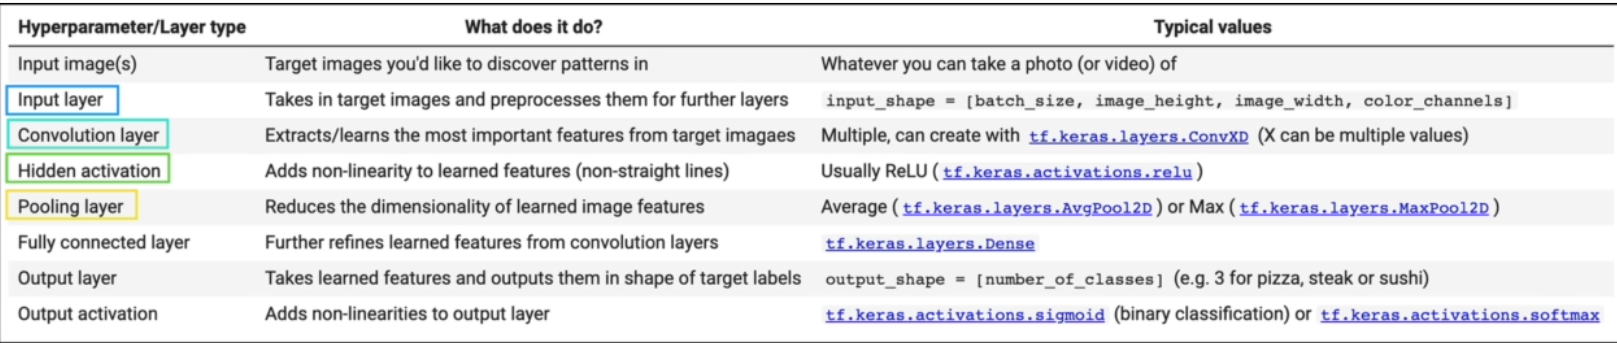

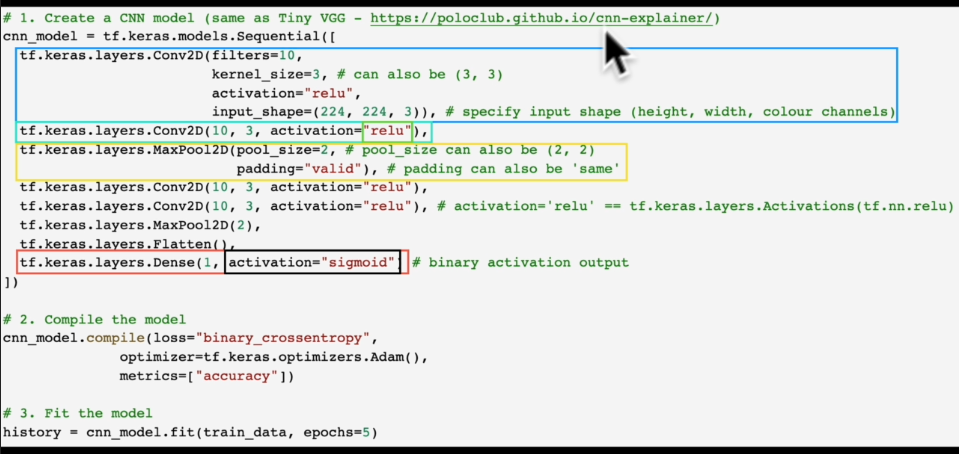


In [1]:
#Food101 dataset
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-22 13:24:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   237MB/s    in 0.4s    

2021-05-22 13:24:35 (237 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
!ls pizza_steak

test  train


In [3]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"{len(dirnames)} {len(filenames)} {(dirpath)}" )

2 1 pizza_steak
2 1 pizza_steak/test
0 250 pizza_steak/test/steak
0 250 pizza_steak/test/pizza
2 1 pizza_steak/train
0 750 pizza_steak/train/steak
0 750 pizza_steak/train/pizza


In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


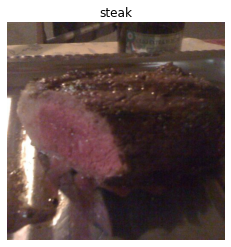

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [16]:
img.shape

(512, 512, 3)

In [52]:
##An end-2-end CNN implementation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (get all pixel values between 0 & 1,also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

#import the  
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, #google standard
                                               target_size=(224, 224), #common size
                                               class_mode="binary",
                                               seed=42) 
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32, #google standard
                                               target_size=(224, 224), #common size
                                               class_mode="binary",
                                               seed=42)

#build a CNN model(tiny vgg)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid")

])
#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6583 - accuracy: 0.6024 - val_loss: 0.3915 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4201 - accuracy: 0.8174 - val_loss: 0.3510 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3929 - accuracy: 0.8366 - val_loss: 0.3979 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3498 - accuracy: 0.8625 - val_loss: 0.3151 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3194 - accuracy: 0.8648 - val_loss: 0.3214 - val_accuracy: 0.8720


In [55]:
model_1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28090)           

In [59]:
import tensorflow as tf
tf.random.set_seed(42)
#create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid"),
])
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#fit the model
histoy_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 173ms/step - loss: 0.7287 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6928 - accuracy: 0.5323 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6930 - accuracy: 0.5144 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6931 - accuracy: 0.5265 - val_loss: 0.6932 - val_accuracy: 0.5000


In [60]:
model_2.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_60 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.

model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.